##### Module 3 Autograded Assignment

Let's review Module 3 shall we?

Please do not add or delete cells as this may affect the autograder.

In [59]:
# Load Required Library for Autograder-- run this cell as it is!
library(testthat)

## Problem 1

Workers at a candy factory fill boxes with assorted chocolates that are coming down an assembly line. There are many flavors of chocolates but each can be categorized into one of two types: "filled" or "unfilled". 

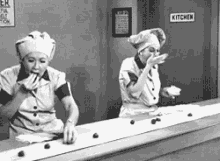

Suppose the probability that a and given piece of chocolate to come down the line is filled is some unknown value $p$. Further suppose that a chocolate's type is independent of the types of every other piece on the assembly line.

The workers are trying to fill an order for an eccentric customer who has asked for 10 boxes of candy. The customer has instructed the workers to put chocolate, as it comes down the line, into the boxes as long as they are unfilled pieces. As soon as the workers come accross a filled chocolate, they are to eat it themselves, close the box, and put the box in the customers bag. Note that the customer can end up with some empty boxes!

Let $X_i, i \in {1. \dots, n}$ be the number of pieces of chocolate put into box $i$. This means $X$ has a geometric distribution with some probability $p$:

$$ f_X(x) = p(1-p)^xI_{\{0,1,\dots\}}(x) $$

**Part A)** What is the MLE $\hat{p}$, given $X_1, \dots, X_n$? Once you are ready to answer, give the integer number corresponding to your answer in the variable `prob.1.a`. (i.e. Possible answers are 1,2,3,4,5,6)

1. $\bar{X}$
2. $1/\bar{X}$
3. $1 / (\bar{X}+1)$
4. $\bar{X} / (1 - \bar{X})$
5. $(1 - \bar{X}) / \bar{X}$
6. None of the above.

In [60]:
prob.1.a = 3

# your code here


In [61]:
# Hidden Test Cell
test_that("Make sure your answer is a numeric!", expect_is(prob.1.a, "numeric"))

Test passed 😸


**Part B)** 

We have a theoretical understanding of what $\hat{p}$ should be, but let's she what that value is when we have actual data.

The cell below loads 10 samples of this random variable. In other words, we opened 10 boxes of chocolates, and recorded the number of chocolates we had to eat before we found an unfilled chocolate. We only have 10, because we needed a break from the chocolate at that point. Using that data, calculate $\hat{p}$ of your sample. Save your solution as `p.hat`.

In [62]:
# Load the data
trials = readRDS("trials.rds")
trials

[1] 1 1 7 0 3 0 1 4 4 0

In [63]:
mean(trials)

[1] 2.1

In [64]:
p.hat = 0.322

# 1+1+7+3+1+4+4 = 21 
# 21/10 = 2.1
# 1/(X- +1)
# 1/(2.1+1) = 0.322

In [65]:
# Hidden Test Cell

**Part C)**

Remember, an estimator is still a random variable. That means the $\hat{p}$ we calculated in **Part B** is just one instance from some underlying sampling distribution for $\hat{p}$. Let's take a look at what this underlying distribution look like.

The cell below loads a table containing 1000 instances of the above trials. That is, we opened 10 boxes and, for each box, recorded the number of chocolates that we observed before one was unfilled. Then we repeated that process 1000 times. That's a lot of chocolate.

Calculate the $\hat{p}$ for each instance of the data. This should result in a vector of length 1000. Then plot a histogram of these $\hat{p}$ values.

Save four statistics from these $\hat{p}$'s:
* The sample mean as `p.hat.sample.mean`.
* The sample standard deviation as `p.hat.sample.sd`.
* The sample minimum as `p.hat.sample.min`.
* The sample maximum as `p.hat.sample.max`.

In [66]:
chocolate.data = read.csv("more_chocolate.csv")
chocolate.data = chocolate.data[-1]
head(chocolate.data)

,box1,box2,box3,box4,box5,box6,box7,box8,box9,box10
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1,1,6,1,4,4,0,1,9
2,0,6,1,8,1,0,0,2,0,5
3,0,6,2,3,1,0,0,2,1,0
4,3,6,2,2,2,3,0,6,0,3
5,1,2,0,0,2,2,3,0,2,2
6,0,1,0,0,2,0,0,2,4,3


[1] 0.3194003

[1] 0.08821157

[1] 0.1369863

[1] 0.6666667

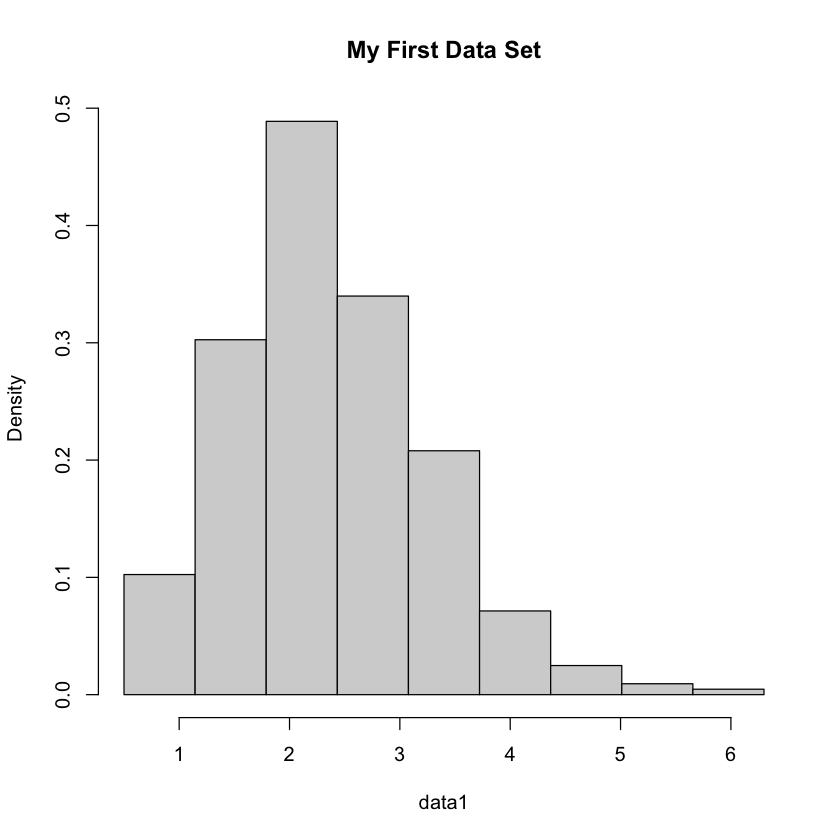

In [67]:
data1 <- rowMeans(chocolate.data)
# length(data1)

phats <- c()
for (i in data1) {
    new_val <- (1/(i+1))
    phats <- c(phats, new_val)
}

# length(phats)


p.hat.sample.mean <- mean(phats)
p.hat.sample.sd <- sd(phats)
p.hat.sample.min <- min(phats)
p.hat.sample.max <- max(phats)

min_val <- min(data1)
max_val <- max(data1)
br <- seq(min_val, max_val, length.out = 10)
hist(data1, prob = TRUE, breaks = br, main = "My First Data Set")


p.hat.sample.mean 
p.hat.sample.sd 
p.hat.sample.min 
p.hat.sample.max

In [68]:
# Hidden Test Cell

**Thought Exercise**

The underlying probability for this question was $p=0.3$. Take a look at the histogram and the calculated values around your $\hat{p}$'s. How similar was the MLE to the actual value? 

**Part D)** 

Another important thing to note is that we only opened $10$ boxes for each trial. Would our sample $\hat{p}$ histogram be wider if we opened more boxes for each trial, say 20? Submit your answer by saving either `wider`, `narrower` or `same` into variable `prob.1.d`.

In [69]:
prob.1.d = 'narrower'

# your code here



In [70]:
# Hidden Test Cell
test_that("Make sure answer is within group", expect_true(prob.1.d %in% c("wider", "narrower", "same")))

Test passed 😀


# Problem 2

Let $X_i \sim Poisson(\lambda), i\in{1,\dots,n}$ with $\lambda = 5$. Recall that the MLE $\hat\lambda$ for a Poisson distribution is equal to the sample mean $\bar{X}$.

**Part A)** 

The data being created into `prob.2.a.data` is 12 random samples from the $Poisson(5)$ distribution. Calculate the observed MLE, as well as the theoretical variance and bias for the MLE. (Your variance and bias calculations will have nothing to do with the generated data.) Store the your answers in `mle`, `mle.var` and `mle.bias` respectively.

In [82]:
set.seed(0)
lambda = 5
n = 12
prob.2.a.data = rpois(n, lambda)
prob.2.a.data

[1] 8 4 4 5 8 3 8 9 6 6 2 3

In [88]:
install.packages("maxLik")


also installing the dependencies ‘zoo’, ‘miscTools’, ‘sandwich’





The downloaded binary packages are in
	/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T//RtmpX0GR2s/downloaded_packages


In [89]:
library(maxLik)


Loading required package: miscTools


Please cite the 'maxLik' package as:
Henningsen, Arne and Toomet, Ott (2011). maxLik: A package for maximum likelihood estimation in R. Computational Statistics 26(3), 443-458. DOI 10.1007/s00180-010-0217-1.

If you have questions, suggestions, or comments regarding the 'maxLik' package, please use a forum or 'tracker' at maxLik's R-Forge site:
https://r-forge.r-project.org/projects/maxlik/



In [90]:
# Fit Poisson model to data
fit <- glm(prob.2.a.data ~ 1, family = poisson(link = "log"))

# Calculate log-likelihood
logliks <- logLik(fit)


In [91]:
## Estimate the parameter of exponential distribution
# t <- rexp(100, 2)
# loglik <- function(theta) log(theta) - theta*t
# gradlik <- function(theta) 1/theta - prob.2.a.data
# hesslik <- function(theta) -100/theta^2
## Estimate with numeric gradient and hessian
a <- maxLik(logliks, start=1, control=list(printLevel=2))
summary( a )

ERROR: Error in checkFuncArgs(logLik, argNames, "logLik", "maxLik"): argument 'logLik' of function 'maxLik' is not a function


In [59]:
# # 5/12
# # Var(𝑋¯) = 5/𝑛
# # Bias(𝑋¯) = 5(1 - 1/𝑛)

# # 5*(1 - (1/12))
# # Calculate the MLEs for the two datasets
# lambda_hat1 <- mean(prob.2.a.data)
# # lambda_hat2 <- mean(data2)

# # Calculate the variances of the MLEs
# var_lambda_hat1 <- var(prob.2.a.data) / length(prob.2.a.data)
# # var_lambda_hat2 <- var(data2) / length(data2)

# lambda_hat1
# var_lambda_hat1

In [60]:
# For a Poisson Distribution, the mean and the variance are equal. It means that E(X) = V(X)

# mean(prob.2.a.data)

In [61]:
# hist(prob.2.a.data)

In [62]:
# # WRONG ANSWERS

# 5.5
# 0.416666666666667
# 4.58333333333333

# 5.25
prob.2.a.data# 0

# 5.5
# 0.416666666666667
# 0.5

# 5.5
# 0.458333333333333
# 0

# 5.5
# 5
# 0.5

# 5.5
# 0.2
# 0.5

# 5.5
# -1
# 0

# 5.25
# 0.417
# -0.416666666666667

# 0.181818181818182
# 6.545455
# 0.083

# 5.5
# '5/n'
# '5(1 - 1/n)'

# mle = 4.833333
# mle.var = 0.2
# mle.bias = 0

In [63]:
# mle = mean(prob.2.a.data)
# mle.var = NA
# mle.bias = NA

# # your code here
# pois <- prob.2.a.data
# mle.var <- var(pois)
# mle <- mean(pois)
# # sd(pois)



mle
mle.var
mle.bias

ERROR: Error in eval(expr, envir, enclos): object 'mle' not found


In [65]:
# Hidden Test Cell

**Part B)**

What is the $MSE(\hat\lambda)$? Save your answer as `mse`.

In [58]:
mse = NA

# your code here



mses <- c()
for (i in prob.2.a.data) {
    new_val <- (i - 5.5)^2
    mses <- c(mses, new_val)
}
meanz <- mean(mses)
5.5 - meanz
# length(phats)


mse

# # Wrong answers:

# mse = 0.6667
# mse = 0.4167
# mse = 0.1818
# mse = 0.45
# mse = 0.25
# mse = 0.501
# mse = 0.9106
# mse = 0.042
# mse = 0.908
# mse = 0.5


# mse = 1.92307692307692
# mse = 2.5
# mse = 2.58
# mse = 5
# mse = 5.347
# mse = 5.25
# mse = 5.765



[1] 0.4166667

[1] NA

In [50]:
0.5^2 + 0.4167

[1] 0.6667

In [67]:
# Hidden Test Cell

**Part C)**

Let the MLE from **Part A** be denoted $\hat\lambda_1$. The data be created into `prob.2.c.data` is 8 samples from the $Poisson(5)$ distribution. Let the MLE for this distribution be $\hat\lambda_2$. What is the relative efficiency of $\hat\lambda_1$, realtive to $\hat\lambda_2$? Save your answer as `rel.eff`.

In [68]:
set.seed(112358)
n.2 = 8
prob.2.c.data = rpois(n.2, lambda)
prob.2.c.data

[1] 4 6 8 6 6 7 4 6

In [86]:
rel.eff <- (5/8) / (5/12) 

# your code here
# To calculate the relative efficiency of two estimators, we use the formula:

# rel.eff = Var(𝜆̂ 2) / Var(𝜆̂ 1)

# Since the 𝑃𝑜𝑖𝑠𝑠𝑜𝑛(5) distribution has a variance of 𝜆, the variance of the MLE for this distribution is also 𝜆. Therefore, the variance of 𝜆̂ 2 is 5/8.

# Using the values calculated in Part A, we can calculate the variance of 𝜆̂ 1 as:

# Var(𝜆̂ 1) = 𝜆 / n = 5 / 12

# Therefore, the relative efficiency of 𝜆̂ 1 relative to 𝜆̂ 2 is:

# rel.eff = Var(𝜆̂ 2) / Var(𝜆̂ 1) = (5/8) / (5/12) = 1.2

# So the relative efficiency of 𝜆̂ 1 relative to 𝜆̂ 2 is 1.2.

rel.eff

[1] 1.5

In [71]:
# Hidden Test Cell